# SHAP and LIME on MOLECULAR TAXONOMY OF BREAST CANCER INTERNATIONAL CONSORTIUM (METABRIC)

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import session_info 
import xgboost as xgb
import random
from lime import lime_tabular
from sklearn.model_selection import train_test_split, StratifiedKFold
import lime 
import shap
import warnings
warnings.filterwarnings('ignore')

# Data load and preprocessing 

## Expression data

In [17]:
df = pd.read_csv("/Users/lamine/Explainqble AI /metabric_test.csv")
df.head(5)

,CD52,DARC,DCN,DB005376,TAT,GSTM1,UGT2B11,AKR7A3,SERHL2,ASS1,...,MYB,PROM1,GSTT1,NELL2,CST5,CCL5,TFF3,CDH3,SLC39A6,SHISA2
0,8.240128,10.731211,11.251592,5.350604,5.698745,5.626606,5.845062,8.334491,7.150713,9.887783,...,7.864506,10.475799,5.236212,6.462909,5.333817,8.771015,10.545305,8.588759,8.287300,6.155340
1,7.441887,6.498731,9.968656,5.701508,5.416231,5.108180,5.382890,10.277779,6.070879,6.203103,...,10.699097,5.977531,8.450049,7.486917,5.464502,8.216436,10.422146,5.838056,10.380559,9.409817
2,7.977708,6.615727,9.632207,6.346358,5.480066,5.356168,7.798285,9.117568,6.230590,7.928613,...,9.861437,8.517411,7.230715,11.957439,5.359362,8.012079,12.201802,6.681570,10.009376,9.094121
3,8.045781,5.806614,8.927632,5.628718,5.746114,5.402901,6.043053,10.057702,11.682904,10.047193,...,9.138474,9.099391,8.072639,12.478907,5.523048,9.245577,14.169804,6.392376,11.141299,10.039994
4,9.001653,7.928994,9.356798,5.484226,5.152513,5.401268,8.511554,11.127156,7.472530,7.200276,...,9.591358,7.264378,8.975517,10.044922,5.034380,10.243518,13.568835,8.476834,8.916101,5.929184


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Columns: 295 entries, CD52 to SHISA2
dtypes: float64(295)
memory usage: 4.3 MB


In [13]:
df.describe()

,CD52,DARC,DCN,DB005376,TAT,GSTM1,UGT2B11,AKR7A3,SERHL2,ASS1,...,MYB,PROM1,GSTT1,NELL2,CST5,CCL5,TFF3,CDH3,SLC39A6,SHISA2
count,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,...,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000
mean,8.522002,7.439279,8.592254,6.084079,6.267616,6.477882,6.920908,9.397352,7.558455,8.298495,...,9.743111,8.041666,8.295523,7.466347,6.033271,9.845330,11.742209,7.465389,9.204424,7.725656
std,1.349624,1.323882,1.366120,1.489150,1.623607,1.490238,2.132190,1.280389,1.724598,1.314099,...,1.242550,1.996117,1.691650,1.532031,1.500256,1.357065,2.444823,1.274105,1.620264,1.659966
min,5.018810,5.099984,5.074217,4.922326,4.925973,4.939510,4.988302,6.888636,5.214098,5.001618,...,5.565536,5.047322,4.854543,5.030010,4.965204,5.685101,5.154748,5.103031,5.510203,5.119337
25%,7.526147,6.337077,7.585572,5.315275,5.400663,5.428807,5.547688,8.359180,6.265815,7.277712,...,9.072006,6.297426,7.469392,6.264153,5.337878,8.875585,10.657896,6.461509,7.869267,6.363869
50%,8.448275,7.331663,8.608817,5.461374,5.563156,5.624529,5.881415,9.331409,7.083379,8.280220,...,10.023695,7.623121,8.889979,7.056264,5.484401,9.857851,12.473404,7.303850,9.201048,7.358426
75%,9.428863,8.370030,9.566763,5.971988,6.175448,7.490048,7.556015,10.241203,8.371308,9.256413,...,10.654395,9.607842,9.489065,8.371956,5.818663,10.791775,13.588736,8.255375,10.508201,8.869039
max,13.374739,11.619202,12.478475,13.010996,13.166804,12.070735,14.145451,13.512971,13.731721,12.182876,...,12.091906,13.569006,12.784519,13.110442,13.922840,14.004198,14.808641,12.003642,13.440167,12.874823


## label data 

In [18]:
metadata = pd.read_csv("/Users/lamine/Explainqble AI /metabric_clin.csv")
metadata.head(5)

,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
0,MB-0000,10.0,6.044,NaN,NO,1.0,Positve,NEUTRAL,YES,Post,...,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY,0:Not Recurred,138.65
1,MB-0002,0.0,4.020,High,NO,1.0,Positve,NEUTRAL,YES,Pre,...,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,83.52
2,MB-0005,1.0,4.030,High,YES,1.0,Positve,NEUTRAL,YES,Pre,...,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY,1:Recurred,151.28
3,MB-0006,3.0,4.050,Moderate,YES,1.0,Positve,NEUTRAL,YES,Pre,...,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY,0:Not Recurred,162.76
4,MB-0008,8.0,6.080,High,YES,1.0,Positve,NEUTRAL,YES,Post,...,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY,1:Recurred,18.55


In [72]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PATIENT_ID                     1897 non-null   object 
 1   LYMPH_NODES_EXAMINED_POSITIVE  1897 non-null   float64
 2   NPI                            1897 non-null   float64
 3   CELLULARITY                    1843 non-null   object 
 4   CHEMOTHERAPY                   1897 non-null   object 
 5   COHORT                         1897 non-null   float64
 6   ER_IHC                         1867 non-null   object 
 7   HER2_SNP6                      1897 non-null   object 
 8   HORMONE_THERAPY                1897 non-null   object 
 9   INFERRED_MENOPAUSAL_STATE      1897 non-null   object 
 10  SEX                            1897 non-null   object 
 11  INTCLUST                       1897 non-null   object 
 12  AGE_AT_DIAGNOSIS               1897 non-null   f

In [22]:
metadata.columns

Index(['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY',
       'CHEMOTHERAPY', 'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY',
       'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS',
       'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE',
       'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE',
       'BREAST_SURGERY', 'RFS_STATUS', 'RFS_MONTHS'],
      dtype='object')

In [43]:
print(f"The total patient ids are {metadata['PATIENT_ID'].count()}, from those the unique ids are {metadata['PATIENT_ID'].value_counts().shape[0]} ")

The total patient ids are 1897, from those the unique ids are 1897 


In [59]:
columns = metadata.keys()
columns = list(columns)
print(columns)

['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY', 'CHEMOTHERAPY', 'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY', 'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS', 'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE', 'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE', 'BREAST_SURGERY', 'RFS_STATUS', 'RFS_MONTHS']


In [60]:
# Remove unnecesary elements
columns.remove('PATIENT_ID')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 23 columns of labels for these conditions: ['LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY', 'CHEMOTHERAPY', 'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY', 'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS', 'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE', 'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE', 'BREAST_SURGERY', 'RFS_STATUS', 'RFS_MONTHS']


In [61]:
metadata['THREEGENE'].unique()

array(['ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif',
       'HER2+'], dtype=object)

In [74]:
print(f"The total patient ids are {metadata['PATIENT_ID'].count()}, from those the unique ids CHEMOTHERAPY are {metadata['CHEMOTHERAPY'].value_counts().shape[0]} ")

The total patient ids are 1897, from those the unique ids CHEMOTHERAPY are 2 


In [63]:
print(f'Number of patient ER-/HER2- :%i'  %metadata[metadata['THREEGENE']=='ER-/HER2-'].count()[0])
print(f'Number of patient ER+/HER2- High Prolif :%i'  %metadata[metadata['THREEGENE']=='ER+/HER2- High Prolif'].count()[0])
print(f'Number of patient ER+/HER2- Low Prolif :%i'  %metadata[metadata['THREEGENE']=='ER+/HER2- Low Prolif'].count()[0])
print(f'Number of patient HER2+ :%i'  %metadata[metadata['THREEGENE']=='HER2+'].count()[0])
print(f'Number of patient nan :%i'  %metadata[metadata['THREEGENE']=='nan'].count()[0])

Number of patient ER-/HER2- :290
Number of patient ER+/HER2- High Prolif :598
Number of patient ER+/HER2- Low Prolif :618
Number of patient HER2+ :188
Number of patient nan :0


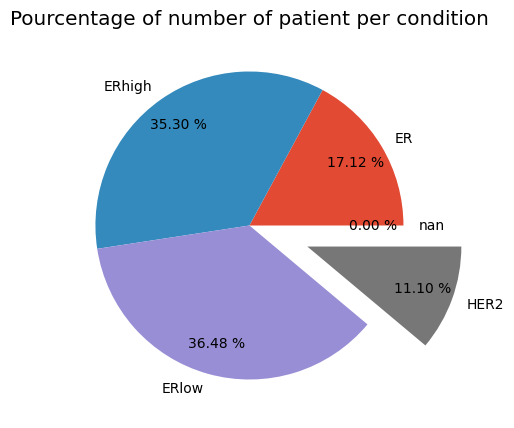

In [71]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')

ER = metadata[metadata['THREEGENE']=='ER-/HER2-'].count()[0]
ERhigh = metadata[metadata['THREEGENE']=='ER+/HER2- High Prolif'].count()[0]
ERlow = metadata[metadata['THREEGENE']=='ER+/HER2- Low Prolif'].count()[0]
HER2 = metadata[metadata['THREEGENE']=='HER2+'].count()[0]
nan = metadata[metadata['THREEGENE']=='nan'].count()[0]


Condition = [ER, ERhigh, ERlow, HER2, nan]
label = ['ER', 'ERhigh', 'ERlow', 'HER2', 'nan']
explode = (0,0,0,.4,0)

plt.title('Pourcentage of number of patient per condition')

plt.pie(Condition, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

In [75]:
print(f'Number of patient CHEMOTHERAPY Yes :%i'  %metadata[metadata['CHEMOTHERAPY']=='YES'].count()[0])
print(f'Number of patient CHEMOTHERAPY NO :%i'  %metadata[metadata['CHEMOTHERAPY']=='NO'].count()[0])


Number of patient CHEMOTHERAPY Yes :396
Number of patient CHEMOTHERAPY NO :1501


In [79]:
Outcome = pd.DataFrame(metadata['CHEMOTHERAPY'])
Outcome.head()

,CHEMOTHERAPY
0,NO
1,NO
2,YES
3,YES
4,YES


In [81]:
Outcome = Outcome.replace("YES",1)
Outcome = Outcome.replace("NO",0)
Outcome.head()

,CHEMOTHERAPY
0,0
1,0
2,1
3,1
4,1


In [83]:
print('Labels counts in Outcome Yes and No respectively:', np.bincount(Outcome['CHEMOTHERAPY']))

Labels counts in Outcome Yes and No respectively: [1501  396]


here we clearly dealing with class imbalance.

In [87]:
df.index = metadata['PATIENT_ID']
Outcome.index = metadata['PATIENT_ID']

In [ ]:
Outcome = Outcome[Outcome.index.isin(df.index)]
Outcome.head()

here we clearly dealing with class imbalance.
### Class imbalance correct using imblearn

In [91]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [92]:
ros = RandomOverSampler(random_state=0)
df_resampled, Outcome_resampled = ros.fit_resample(df, Outcome['CHEMOTHERAPY'])

In [97]:
from collections import Counter
print(sorted(Counter(Outcome_resampled).items()))

[(0, 1501), (1, 1501)]


In [99]:
print('Labels counts in Outcome are now:', np.bincount(Outcome_resampled))

Labels counts in Outcome are now: [1501 1501]


# Model

In [176]:
X_train, X_test, y_train, y_test = train_test_split(df_resampled, Outcome_resampled, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)
pred= model.predict(X_test)

In [177]:
acc = model.score(X_train, y_train)
print(f'Test accuracy: {acc:.3f}')

Test accuracy: 0.873


In [178]:
y_pred = pd.DataFrame(model.predict(X_test), columns=['pred'], index=X_test.index)
y_pred.head()

,pred
2786,1
2148,1
1410,0
251,1
2506,1


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

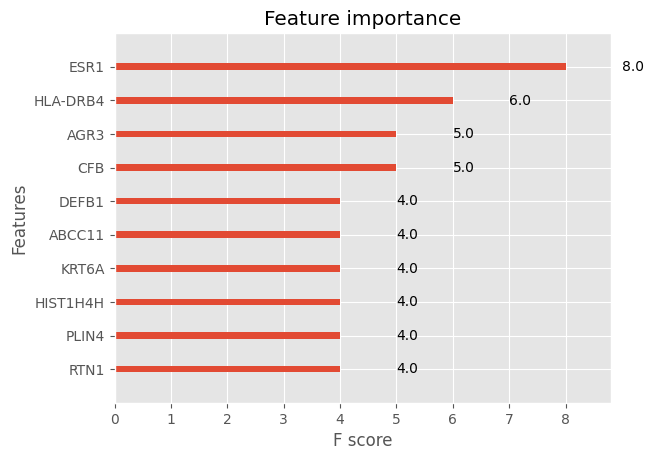

In [179]:
xgb.plot_importance(model,  max_num_features=10)

In [148]:
# Using k-fold cross validation to assess model performance    
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
scores = []
all_imp = []
for k, (train, test) in enumerate(kfold):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    scores.append(score)
    
    print(f'Fold: {k+1:02d}, '
          f'Class distr.: {np.bincount(y_train)}, '
          f'Acc.: {score:.3f}')
    
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')

Fold: 01, Class distr.: [1201 1200], Acc.: 0.875
Fold: 02, Class distr.: [1201 1200], Acc.: 0.875
Fold: 03, Class distr.: [1201 1200], Acc.: 0.875
Fold: 04, Class distr.: [1201 1200], Acc.: 0.875
Fold: 05, Class distr.: [1201 1200], Acc.: 0.875
Fold: 06, Class distr.: [1201 1200], Acc.: 0.875
Fold: 07, Class distr.: [1201 1200], Acc.: 0.875
Fold: 08, Class distr.: [1201 1200], Acc.: 0.875
Fold: 09, Class distr.: [1201 1200], Acc.: 0.875
Fold: 10, Class distr.: [1201 1200], Acc.: 0.875

CV accuracy: 0.875 +/- 0.000


# Explainability

## Lime

In [180]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names= ['NO', 'YES'],
    mode='classification'
)

In [181]:
random.seed(10)
# Choose the instance and use it to predict the results. Here I use the 30th (below the 334 patient). 
exp = explainer.explain_instance(
    data_row=X_test.iloc[8], 
    #num_features: maximum number of features present in explanation. I keept default 10.
    #num_samples: size of the neighborhood to learn the linear model.Default 500.
    predict_fn=model.predict_proba
)
exp.show_in_notebook(show_table=True)

In [182]:
# Show the results as list.
exp.as_list()

[('9.67 < AGR3 <= 10.83', -0.04316021384209577),
 ('9.59 < ESR1 <= 10.91', -0.0404119491280816),
 ('DUSP1 > 11.03', 0.020701450435173546),
 ('9.45 < GATA3 <= 10.35', -0.015545603987935844),
 ('CACNA1H <= 6.06', 0.015490266376913983),
 ('KRT6A <= 5.40', -0.013549350998172813),
 ('9.35 < TBC1D9 <= 10.32', -0.012658607702864103),
 ('CALML5 <= 5.89', -0.01245270304063268),
 ('HOXB5 > 7.31', -0.012228074031454953),
 ('C1orf106 <= 5.96', -0.009504106297160793)]

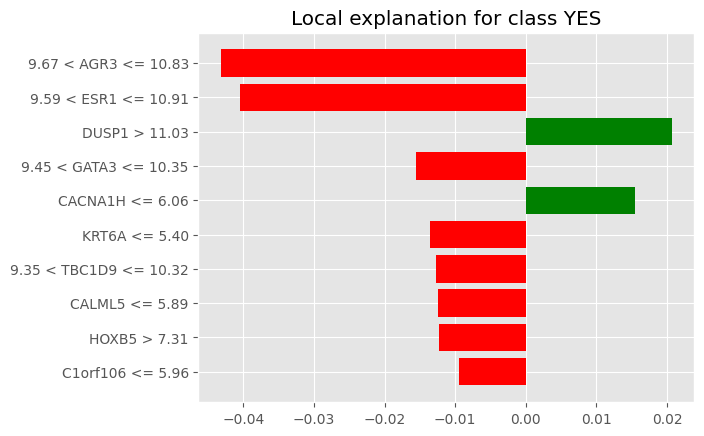

In [183]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [121]:
from lime import submodular_pick

In [122]:
# Let's use SP-LIME to return explanations on a few sample data sets 
# and obtain a non-redundant global decision perspective of the black-box model
sp_exp = submodular_pick.SubmodularPick(explainer, 
                                        np.array(X_test),
                                        model.predict_proba,
                                        num_features=10,
                                        num_exps_desired=2)   

SP-LIME Local Explanations


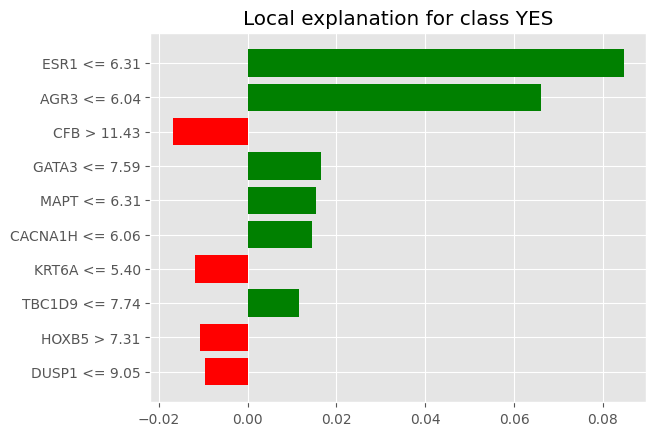

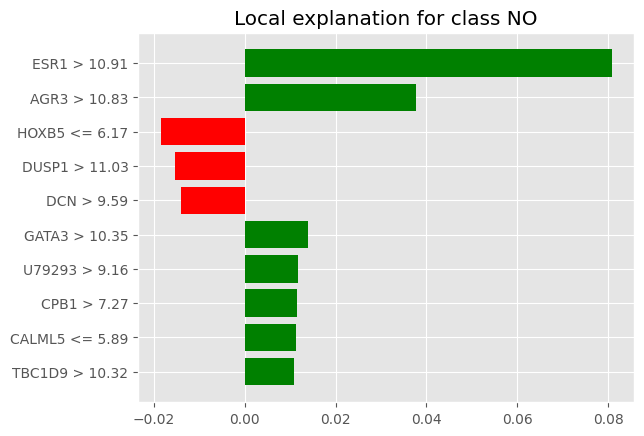

In [123]:
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_exp.sp_explanations]
print('SP-LIME Local Explanations')

## Shap

In [184]:
explainer=shap.Explainer(model)
shap_values = explainer(X_train)
shap_contrib = explainer.shap_values(X_test)

In [185]:
#import Javascript

#shap_values

# This take to much in memory so I am not displaying it.
# shap.initjs(),
# shap.plots.force(shap_values)

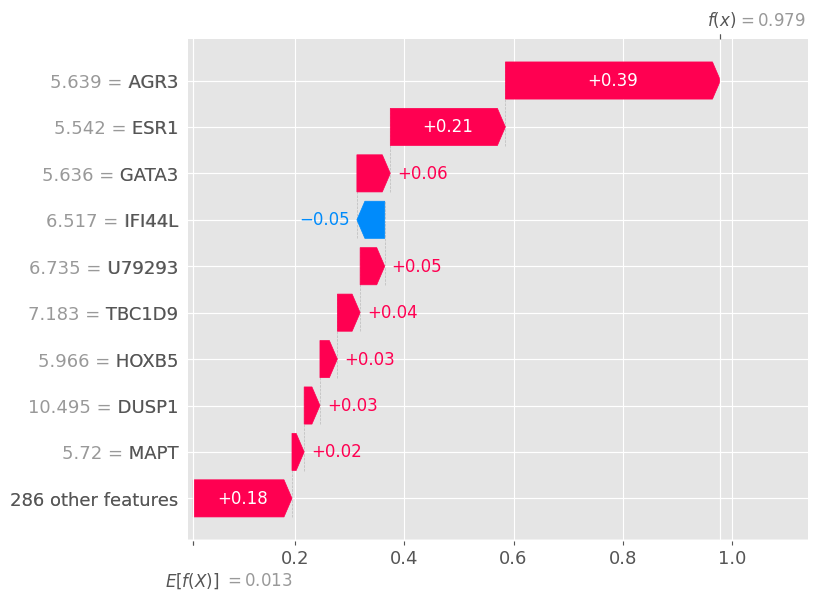

In [186]:
shap.plots.waterfall(shap_values[0])

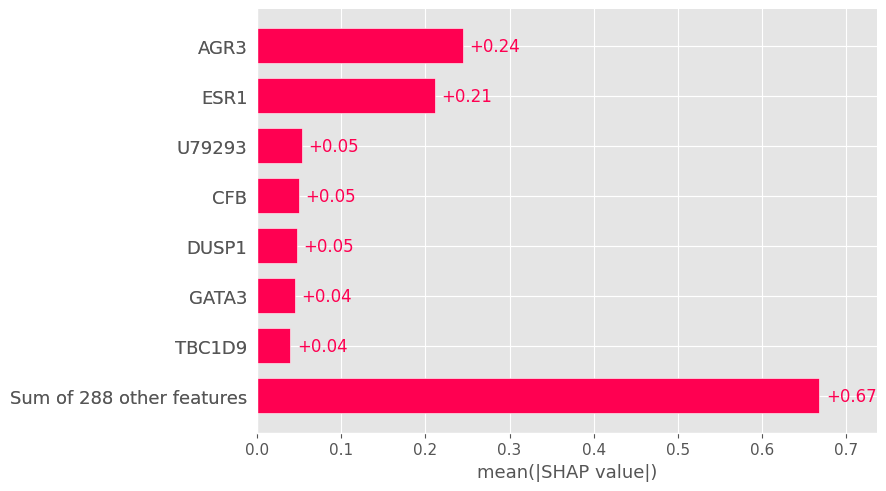

In [187]:
# Global bar plot
shap.plots.bar(shap_values, max_display=8)

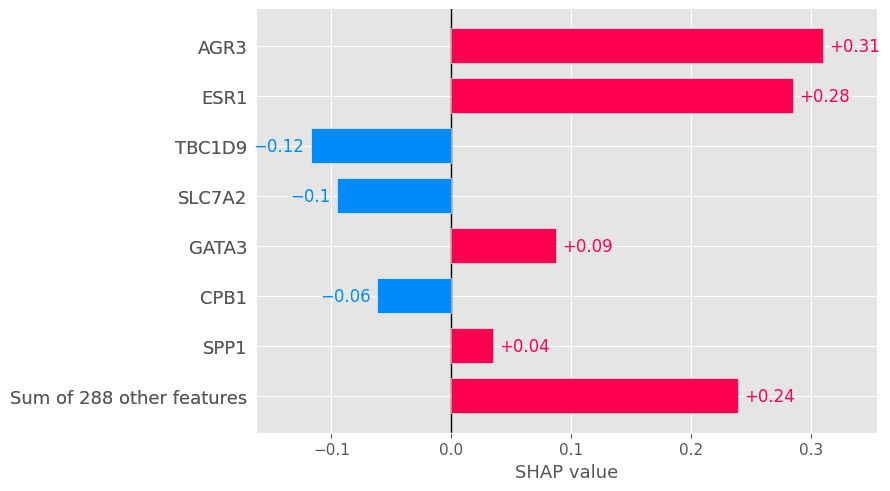

In [188]:
# Local bar plot for the patient 334 (index 8).
shap.plots.bar(shap_values[8], max_display=8)

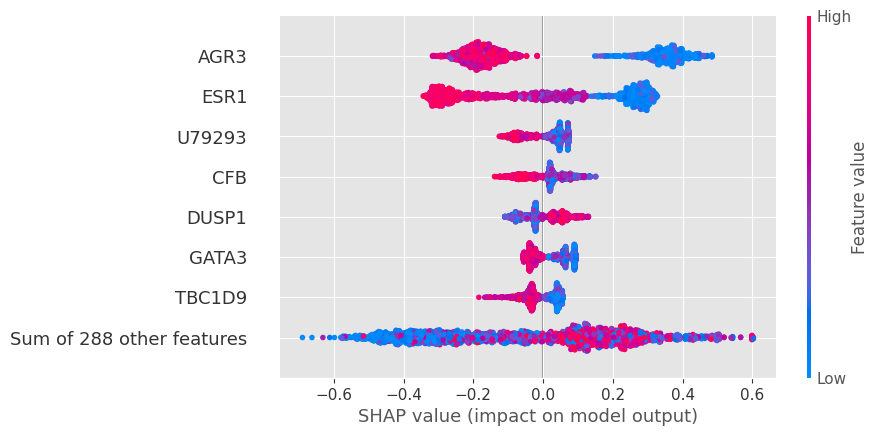

In [189]:
shap.plots.beeswarm(shap_values, max_display=8)

# Explainability Tools

## Shapash

In [190]:
response_dict = {0: 'NO', 1:'YES'}

In [191]:
#!pip install shapash

In [192]:

#
from shapash import SmartExplainer
import tkinter as TK


xpl = SmartExplainer(
    model=model,
    #backend='shap' is the default.
    label_dict=response_dict  #Dictionary mapping integer labels to domain names (classification - target values).
    #preprocessing=encoder,   # Optional: compile step can use inverse_transform method
    #features_dict=name # optional parameter, specifies label for features name 
)

xpl.compile(
   contributions=shap_contrib, # Shap Contributions pd.DataFrame
    y_pred=y_pred,  #Prediction values (1 column only)
    x=X_test,  # a preprocessed dataset: Shapash can apply the model to it
    y_target=y_test #Target values (1 column only). 
)


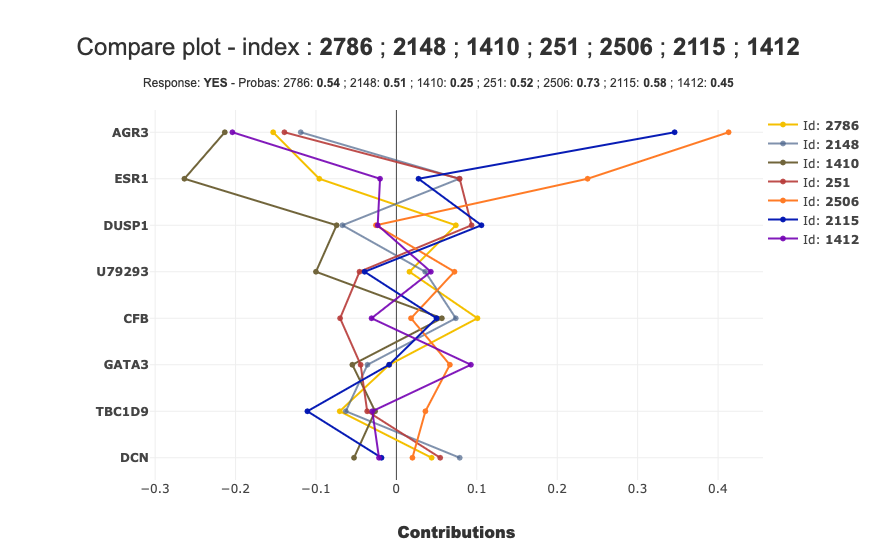

In [194]:
xpl.plot.features_importance(max_features=10, label=1)
xpl.plot.scatter_plot_prediction()
#y_pred
xpl.filter(max_contrib=10)
xpl.plot.local_plot(index=334, label='YES')
xpl.plot.compare_plot(row_num=[0, 1, 2, 3, 4, 5, 6], max_features=8)

In [197]:
#Start WebApp
app = xpl.run_app(port=8850, title_story='Explanation')
# Kill the wepapp
app.kill()

INFO:root:Your Shapash application run on http://MBP-de-Lamine:8850/
INFO:root:Use the method .kill() to down your app.


## Explainerdashboard

In [200]:
#!pip install explainerdashboard

In [201]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [202]:
patient_idx=X_test.index
patient_idx

Index([2786, 2148, 1410,  251, 2506, 2115, 1412, 1642,  408, 2400,
       ...
       2564, 1089,  438, 1718, 2184,  856, 1985,  166,   59,  611],
      dtype='int64', length=901)

In [204]:
explainerdb = ClassifierExplainer(model, X_test, y_test, 
                                    X_background=X_train, 
                                    model_output='y_pred',
                                    idxs=patient_idx,
                                    labels=['NO', 'YES'])

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model, X_background)


In [205]:
db = ExplainerDashboard(explainerdb)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.


FEATURE_DEPENDENCE::independent does not support interactions!


Generating xgboost model dump...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [208]:
#Run the dashboard webApp
db.run(port=8050, mode='external')

In [207]:
db.terminate(8050)

Trying to shut down dashboard on port 8050...


In [214]:
session_info.show()